# DEMO: Source Finding in a Radio Continuum Image.

This demo with load a LoFAR radio continuum image with the LCSpy package and preform the TRSF source finding tool on this data.


## Download required Packages

1. LCSpy (A simple package to get LoFAR archive data).
2. cripser (The homology package required by TRSF). # we will be installing my fork this is to ensure future functionality. The original package is from https://github.com/shizuo-kaji.

There are other requirements, but these are standard packages.

In [ ]:
! pip install LCSpy 

In [ ]:
! pip install -U git+https://github.com/RhysAlfShaw/CubicalRipser_3dim

## Using TRSF

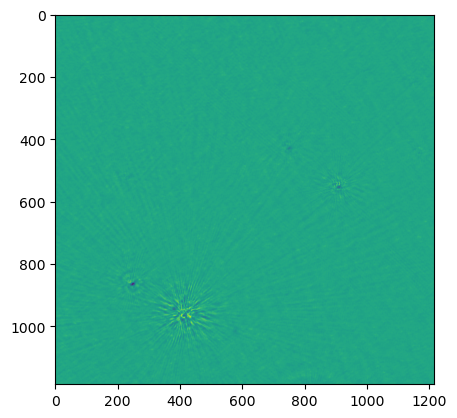

In [18]:
import LCSpy 
import matplotlib.pyplot as plt

Image = LCSpy.cutout_2d(RA=210.0586,DEC=50.5901,size=0.5)
plt.imshow(Image.hdul[0].data)
plt.show()

# we can alternatively use a path to a .fits file.


In [ ]:
from TRSF import trsf

img_PATH = 'PATH/TO/IMAGE.fits'
# cutup_img_size is the size of the cutouts to be used. Default is 250. This is to deal with large images.
data = trsf(img_PATH,cutup_img_size=500,method='cython',gaussian_fitting=False,region_expansion=False,cutup_img = True)

## Plot Image with source bounding boxes

In [ ]:
import matplotlib.pyplot as plt

img = data.full_img
cat = data.catalogue

plt.figure(figsize=(30,30))
plt.imshow(img,vmax=0.00005,cmap='gray')
for i in range(0,len(cat)):
    row = cat.iloc[i]
    bbox = row.bbox
    if bbox != None:
        xmin = bbox[0] 
        xmax = bbox[2] 
        ymin = bbox[1] 
        ymax = bbox[3] 
        plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color='red',label='class 5')
    
plt.show()